## Data Dictionary

|Index||Name of Column|Definition|
|----||---|----|
|1||Gender|Gender of the passengers (Female, Male)|
|2||Customer Type|The customer type (Loyal customer, disloyal customer)|
|3||Age|The actual age of the passengers|
|4||Type of Travel|Purpose of the flight of the passengers (Personal Travel, Business Travel)|
|5||Class| Travel class in the plane of the passengers (Business, Eco, Eco Plus)|
|6||Flight distance| The flight distance of this journey|
|7||Inflight wifi service| Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)|
|8||Departure/Arrival time convenient|Satisfaction level of Departure/Arrival time convenient|
|9||Ease of Online booking| Satisfaction level of online booking|
|10||Gate location| Satisfaction level of Gate location|
|11||Food and drink| Satisfaction level of Food and drink|
|12||Online boarding|Satisfaction level of online boarding|
|13||Seat comfort| Satisfaction level of Seat comfort|
|14||Inflight entertainment: Satisfaction level of inflight entertainment|
|15||On-board service| Satisfaction level of On-board service|
|16||Leg room service| Satisfaction level of Leg room service|
|17||Baggage handling| Satisfaction level of baggage handling|
|18||Check-in service| Satisfaction level of Check-in service|
|19||Inflight service| Satisfaction level of inflight service|
|20||Cleanliness| Satisfaction level of Cleanliness|
|21||Departure Delay in Minutes| Minutes delayed when departure|
|22||Arrival Delay in Minutes| Minutes delayed when Arrival|
|23||Satisfaction| Airline satisfaction level(Satisfaction, neutral or dissatisfaction)|

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, Lasso, lars_path
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, precision_recall_curve,f1_score, roc_auc_score, roc_curve, log_loss,classification_report, auc
%matplotlib inline


from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier



In [2]:
!pip install xlrd

#df = pd.read_excel('../Project2a/satisfaction.xlsx')

In [3]:
#convert excel to csv
#data_xls = pd.read_excel('../Project2a/satisfaction.xlsx', 'satisfaction_v2', dtype=str, index_col=None)
#data_xls.to_csv('satisfaction.csv', encoding='utf-8', index=False)

In [4]:
df = pd.read_csv('../Project 2/satisfaction.csv')
df.head()

id satisfaction_v2  Gender   Customer Type  Age   Type of Travel  \
0   11112       satisfied  Female  Loyal Customer   65  Personal Travel   
1  110278       satisfied    Male  Loyal Customer   47  Personal Travel   
2  103199       satisfied  Female  Loyal Customer   15  Personal Travel   
3   47462       satisfied  Female  Loyal Customer   60  Personal Travel   
4  120011       satisfied  Female  Loyal Customer   70  Personal Travel   

      Class  Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0       Eco              265             0                                  0   
1  Business             2464             0                                  0   
2       Eco             2138             0                                  0   
3       Eco              623             0                                  0   
4       Eco              354             0                                  0   

   ...  Online support  Ease of Online booking  On-board service  \
0  ...               2                       3                 3   
1  ...               2                       3                 4   
2  ...               2                       2                 3   
3  ...               3                       1                 1   
4  ...               4                       2                 2   

   Leg room service  Baggage handling  Checkin service  Cleanliness  \
0                 0                 3                5            3   
1                 4                 4                2            3   
2                 3                 4                4            4   
3                 0                 1                4            1   
4                 0                 2                4            2   

   Online boarding  Departure Delay in Minutes  Arrival Delay in Minutes  
0                2                           0                       0.0  
1                2                         310                     305.0  
2                2                           0                       0.0  
3                3                           0                       0.0  
4                5                           0                       0.0  

[5 rows x 24 columns]

In [5]:
type(df)

pandas.core.frame.DataFrame

#### check data and cleaning

In [5]:
#check for null value
df.isnull().sum()

id                                     0
satisfaction_v2                        0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [6]:
df.shape #check shape

(129880, 24)

In [7]:
df = df.dropna(how='any',axis=0) #drop all the rows with null values as the percentage is about 0.03%

In [8]:
df.isnull().sum() #check for null value again

id                                   0
satisfaction_v2                      0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [9]:
df.shape #check shape again

(129487, 24)

In [10]:
df.rename(columns={'satisfaction_v2': 'satisfaction'}, inplace=True) #rename 

In [11]:
df.dtypes

id                                     int64
satisfaction                          object
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure 

##### Target - Satisfaction

In [12]:
df["satisfaction"].unique() #2 category

array(['satisfied', 'neutral or dissatisfied'], dtype=object)

In [13]:
#encoding of values
df["satisfaction"].replace({"satisfied" : 1, "neutral or dissatisfied": 0}, inplace = True)

##### Catergorical 

In [14]:
df["Customer Type"].unique() #2 category

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [15]:
df["Gender"].unique() #2 category

array(['Female', 'Male'], dtype=object)

In [16]:
df["Type of Travel"].unique() #2 category

array(['Personal Travel', 'Business travel'], dtype=object)

In [17]:
df["Class"].unique() #3 category

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

In [18]:
df['Departure Delay in Minutes'] = df['Departure Delay in Minutes'].astype('float') #convert the dtype
df['Total Delay'] = df['Departure Delay in Minutes'] + df['Arrival Delay in Minutes'] #create new column to combine the delay 
df = df.drop(['Departure Delay in Minutes','Arrival Delay in Minutes'],axis=1)

In [19]:
df = df.drop(['id'],axis=1)

In [20]:
df['satisfaction'].value_counts(normalize=True) #contain the relative frequencies of the unique values

1    0.547406
0    0.452594
Name: satisfaction, dtype: float64

In [21]:
df.shape

(129487, 22)

In [22]:
df.dtypes

satisfaction                           int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Total Delay                          float64
dtype: obj

#### EDA

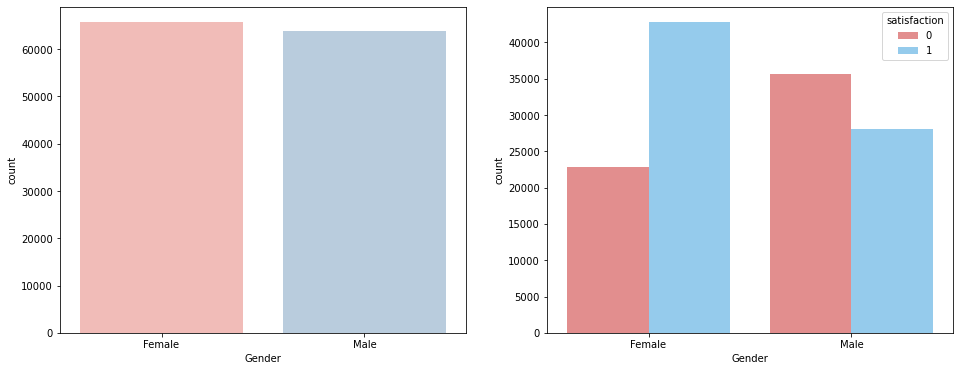

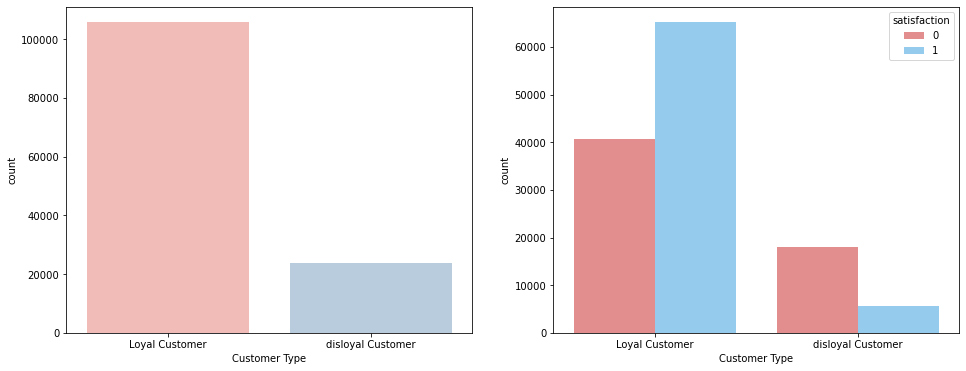

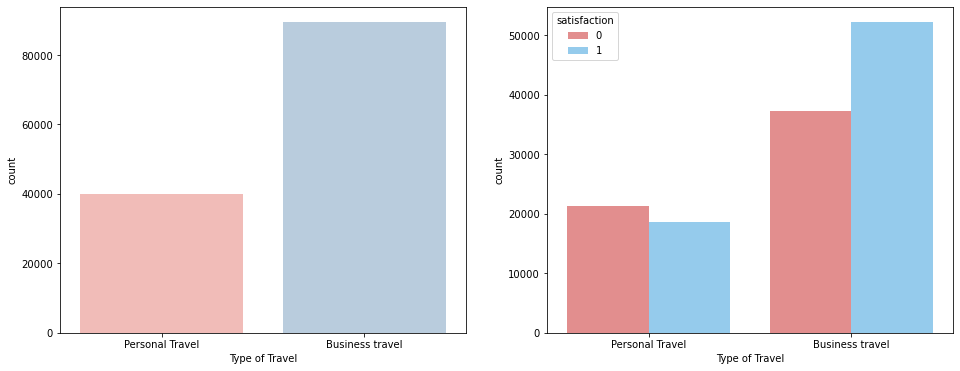

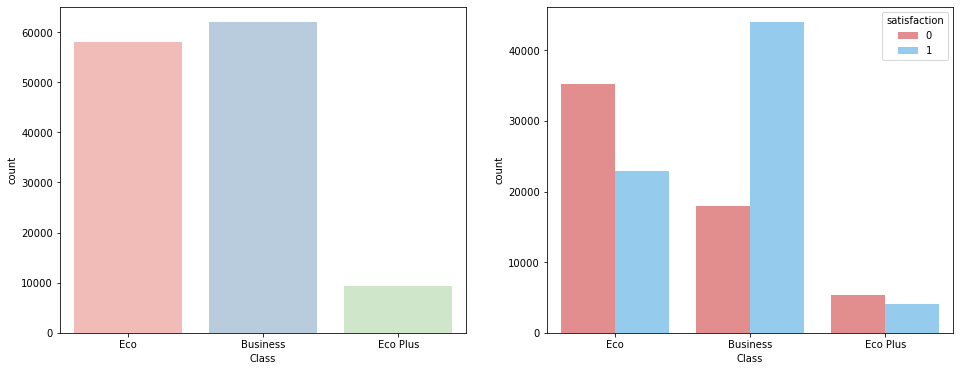

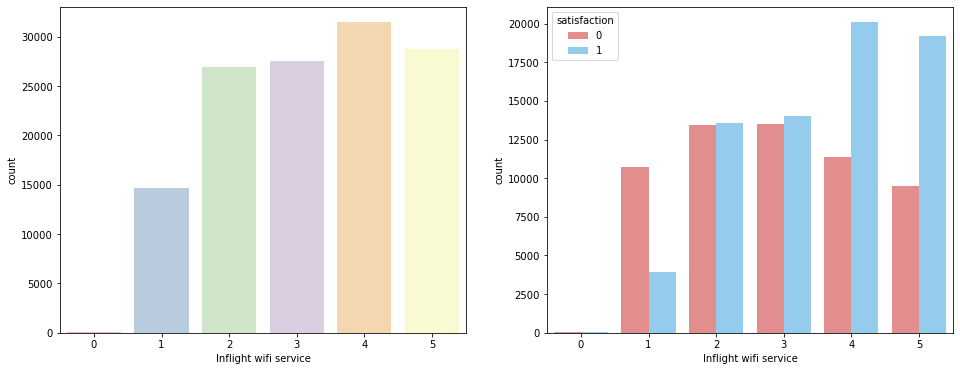

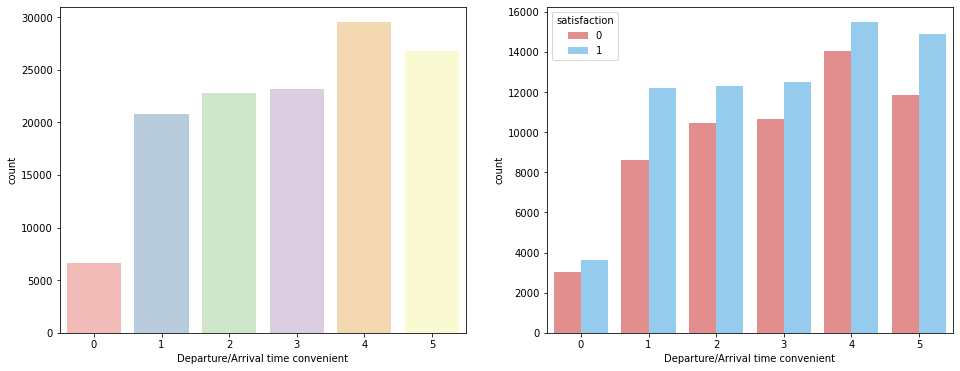

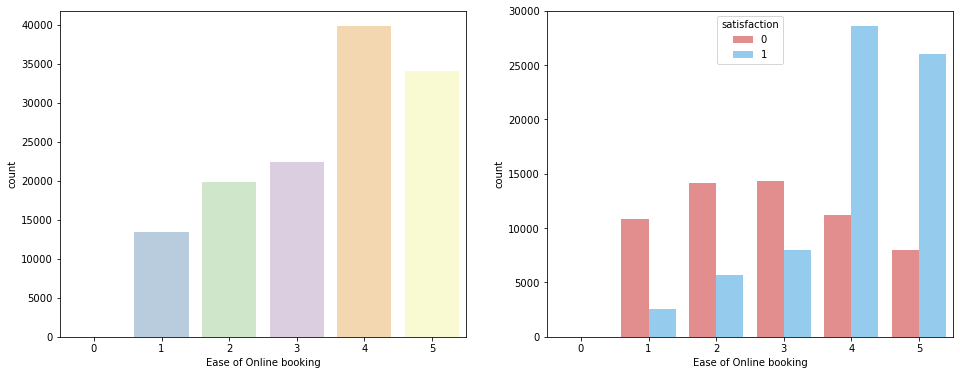

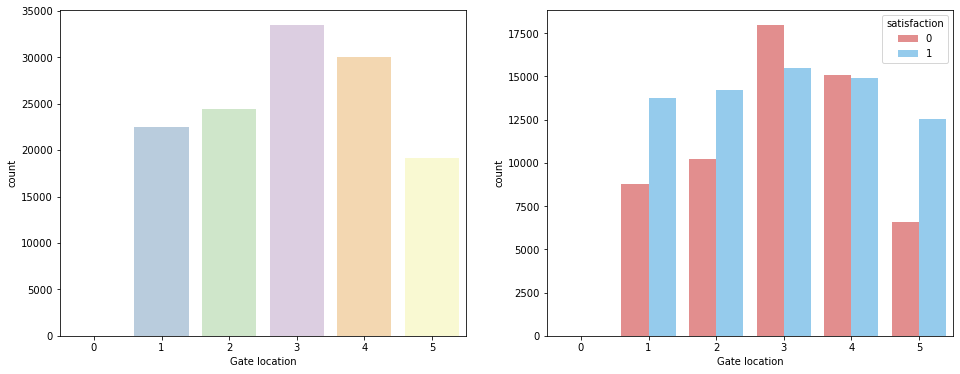

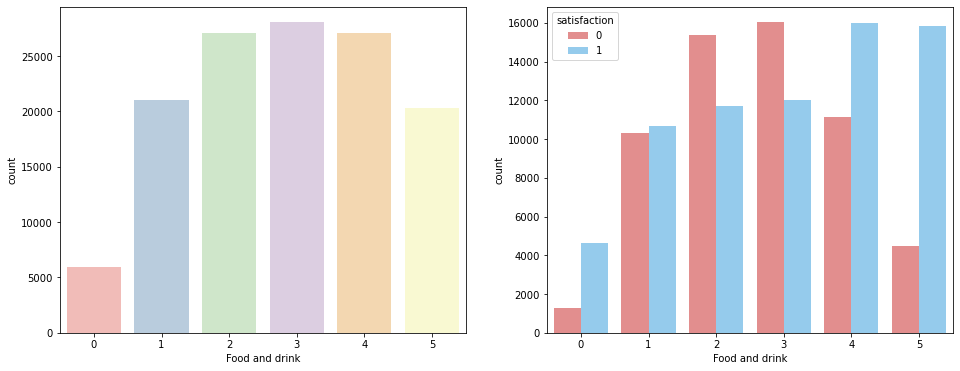

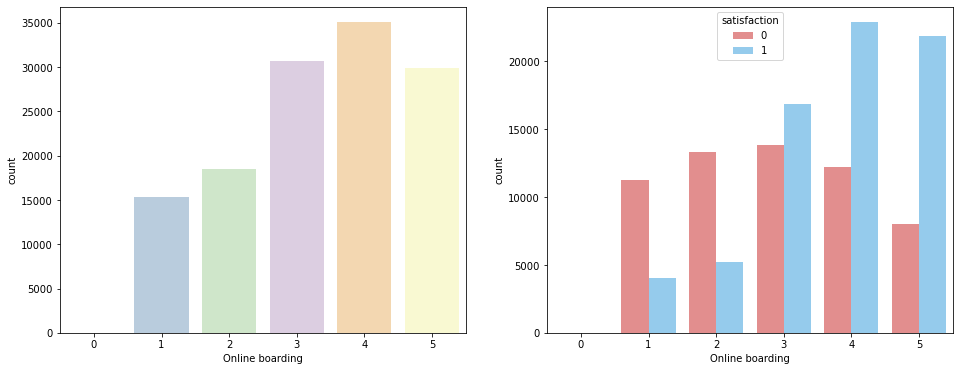

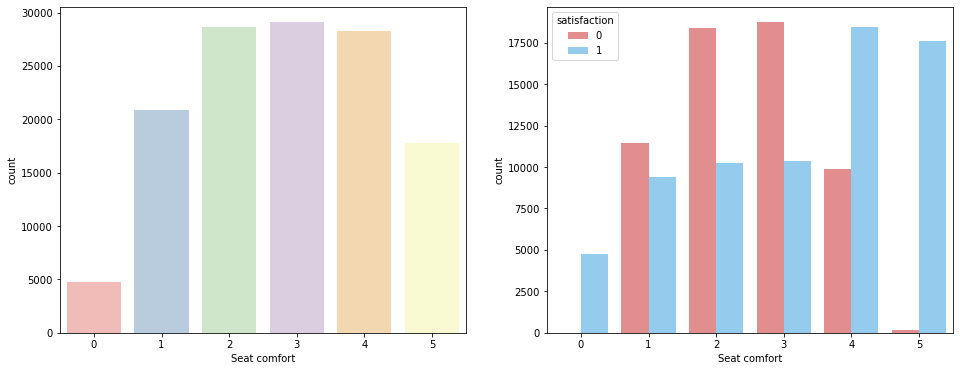

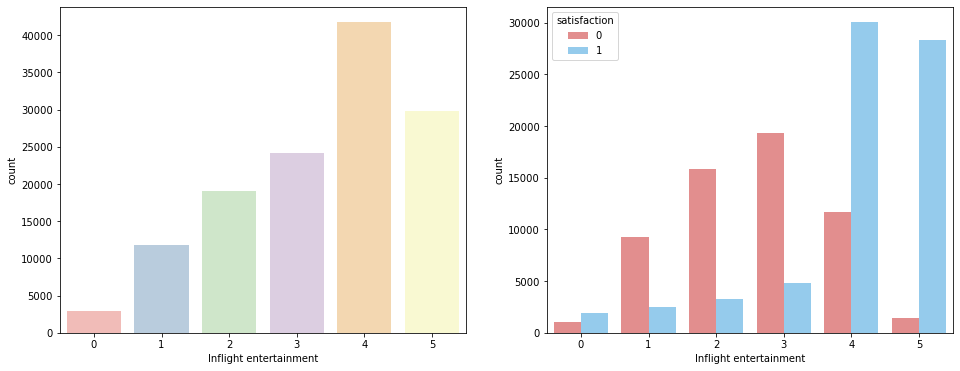

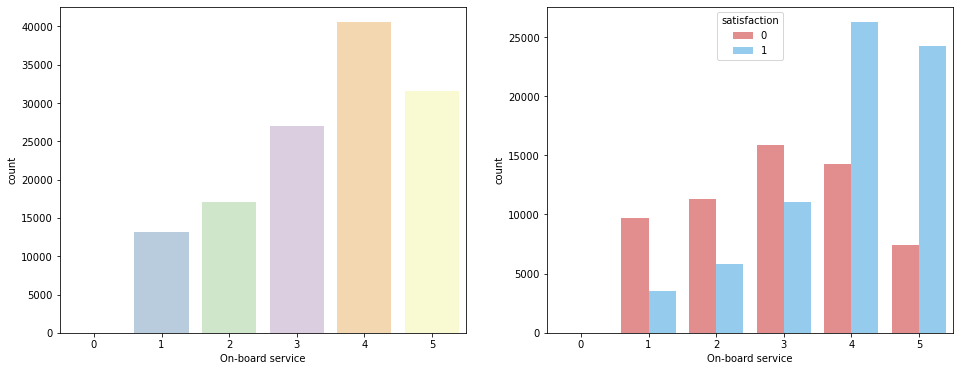

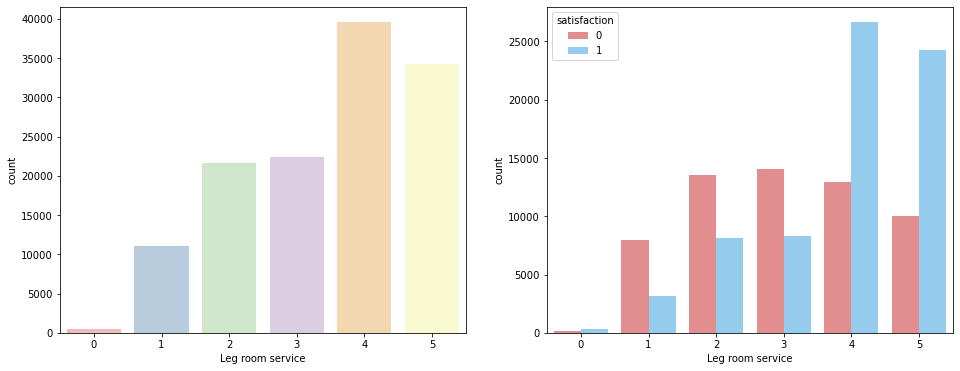

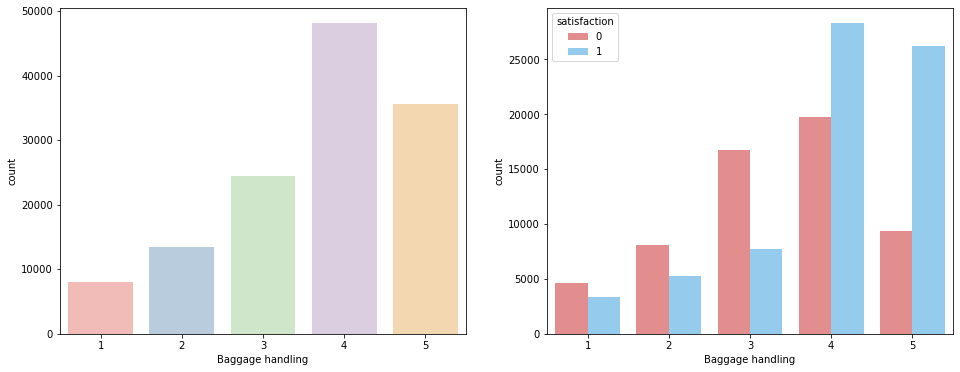

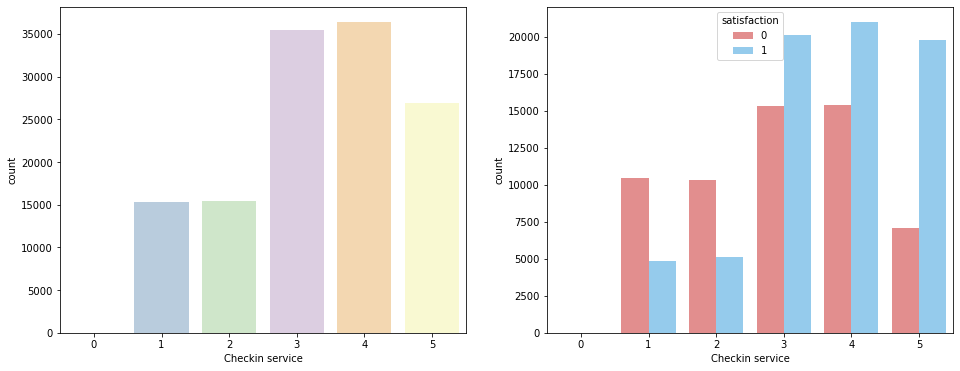

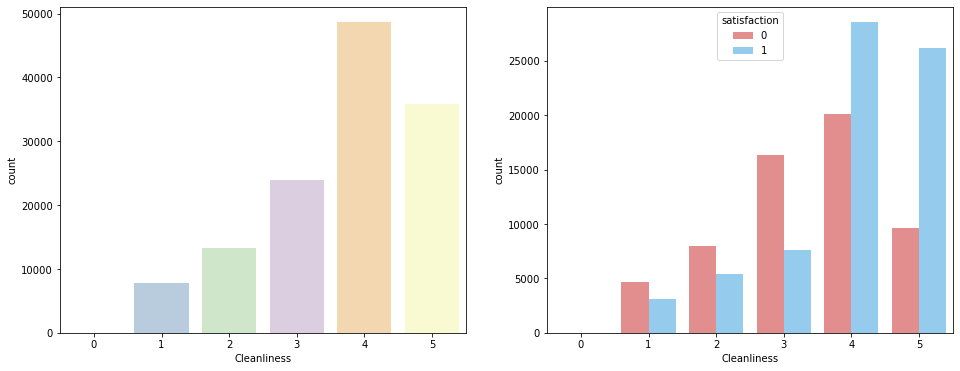

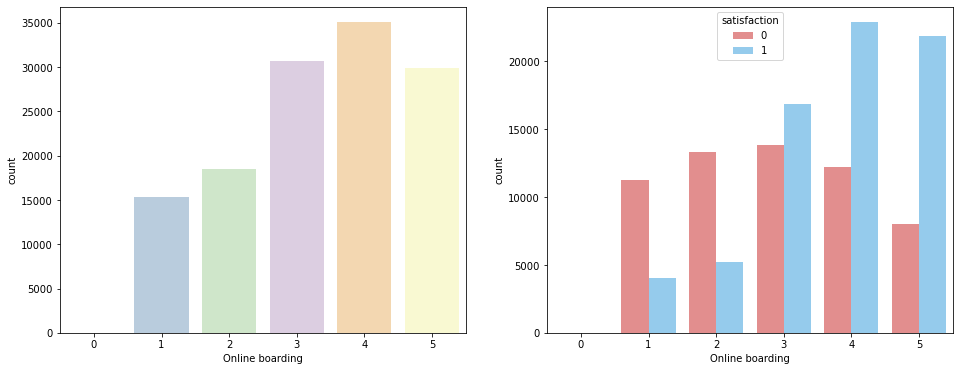

In [23]:
categorics=['Gender', 'Customer Type','Type of Travel', 'Class','Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness',
       'Online boarding']
for i in categorics:
  plt.figure(figsize=(16,6))
  plt.subplot(1,2,1)
  sns.countplot(x=df[i],palette="Pastel1")

  plt.subplot(1,2,2)
  sns.countplot(x=df[i],hue=df.satisfaction, palette=["#f08080","#87cefa"])
  plt.show()

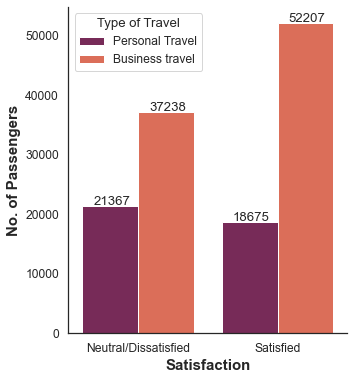

In [24]:
sns.set(style='white',font_scale=1.1)
fig = plt.figure(figsize=[5,6])
ax = sns.countplot(data=df,x='satisfaction',hue='Type of Travel',palette='rocket')
ax.set_xticklabels(['Neutral/Dissatisfied','Satisfied'])
for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.08, p.get_height()+200))
plt.xlabel('Satisfaction',weight='bold',fontsize='15')   
plt.ylabel('No. of Passengers',weight='bold',fontsize='15')   
sns.despine()
plt.savefig('targetplot2.png',transparent=True, bbox_inches='tight')

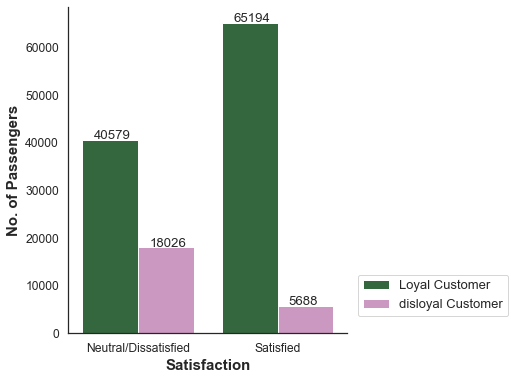

In [25]:
sns.set(style='white',font_scale=1.1)
fig = plt.figure(figsize=[5,6])
ax = sns.countplot(data=df,x='satisfaction',hue='Customer Type',palette='cubehelix')
ax.set_xticklabels(['Neutral/Dissatisfied','Satisfied'])
for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.08, p.get_height()+200))
plt.xlabel('Satisfaction',weight='bold',fontsize='15')   
plt.ylabel('No. of Passengers',weight='bold',fontsize='15')   
plt.legend(loc="upper right", bbox_to_anchor=(1.6, 0.2),fontsize=13)
sns.despine()
plt.savefig('targetplot3.png',transparent=True, bbox_inches='tight')

In [26]:
##find a shorter code on bgroup by age 


In [27]:
df.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Total Delay'],
      dtype='object')

In [28]:
df.dtypes

satisfaction                           int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Total Delay                          float64
dtype: obj

In [29]:
#drop those columns that are not helpful in analysis
df_drop = df.drop(["Age","Customer Type", "Gender", "Type of Travel", "Class", "Flight Distance", "Total Delay"], axis=1)



In [30]:
df_drop

satisfaction  Seat comfort  Departure/Arrival time convenient  \
0                  1             0                                  0   
1                  1             0                                  0   
2                  1             0                                  0   
3                  1             0                                  0   
4                  1             0                                  0   
...              ...           ...                                ...   
129875             1             5                                  5   
129876             0             2                                  3   
129877             0             3                                  0   
129878             0             3                                  2   
129879             0             3                                  4   

        Food and drink  Gate location  Inflight wifi service  \
0                    0              2                      2   
1                    0              3                      0   
2                    0              3                      2   
3                    0              3                      3   
4                    0              3                      4   
...                ...            ...                    ...   
129875               5              3                      2   
129876               2              4                      2   
129877               3              3                      3   
129878               3              2                      3   
129879               3              3                      3   

        Inflight entertainment  Online support  Ease of Online booking  \
0                            4               2                       3   
1                            2               2                       3   
2                            0               2                       2   
3                            4               3                       1   
4                            3               4                       2   
...                        ...             ...                     ...   
129875                       5               2                       2   
129876                       1               1                       3   
129877                       2               2                       4   
129878                       2               2                       3   
129879                       3               3                       4   

        On-board service  Leg room service  Baggage handling  Checkin service  \
0                      3                 0                 3                5   
1                      4                 4                 4                2   
2                      3                 3                 4                4   
3                      1                 0                 1                4   
4                      2                 0                 2                4   
...                  ...               ...               ...              ...   
129875                 3                 3                 4                4   
129876                 2                 3                 3                1   
129877                 4                 3                 4                2   
129878                 3                 2                 3                2   
129879                 5                 5                 5                3   

        Cleanliness  Online boarding  
0                 3                2  
1                 3                2  
2                 4                2  
3                 1                3  
4                 2                5  
...             ...              ...  
129875            4                2  
129876            2                1  
129877            3                2  
129878            1                2  
129879            3                3  

[129487 rows x 15 columns]

In [31]:
df_drop.columns.to_list()

['satisfaction',
 'Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding']

IndexError: index 15 is out of bounds for axis 0 with size 15

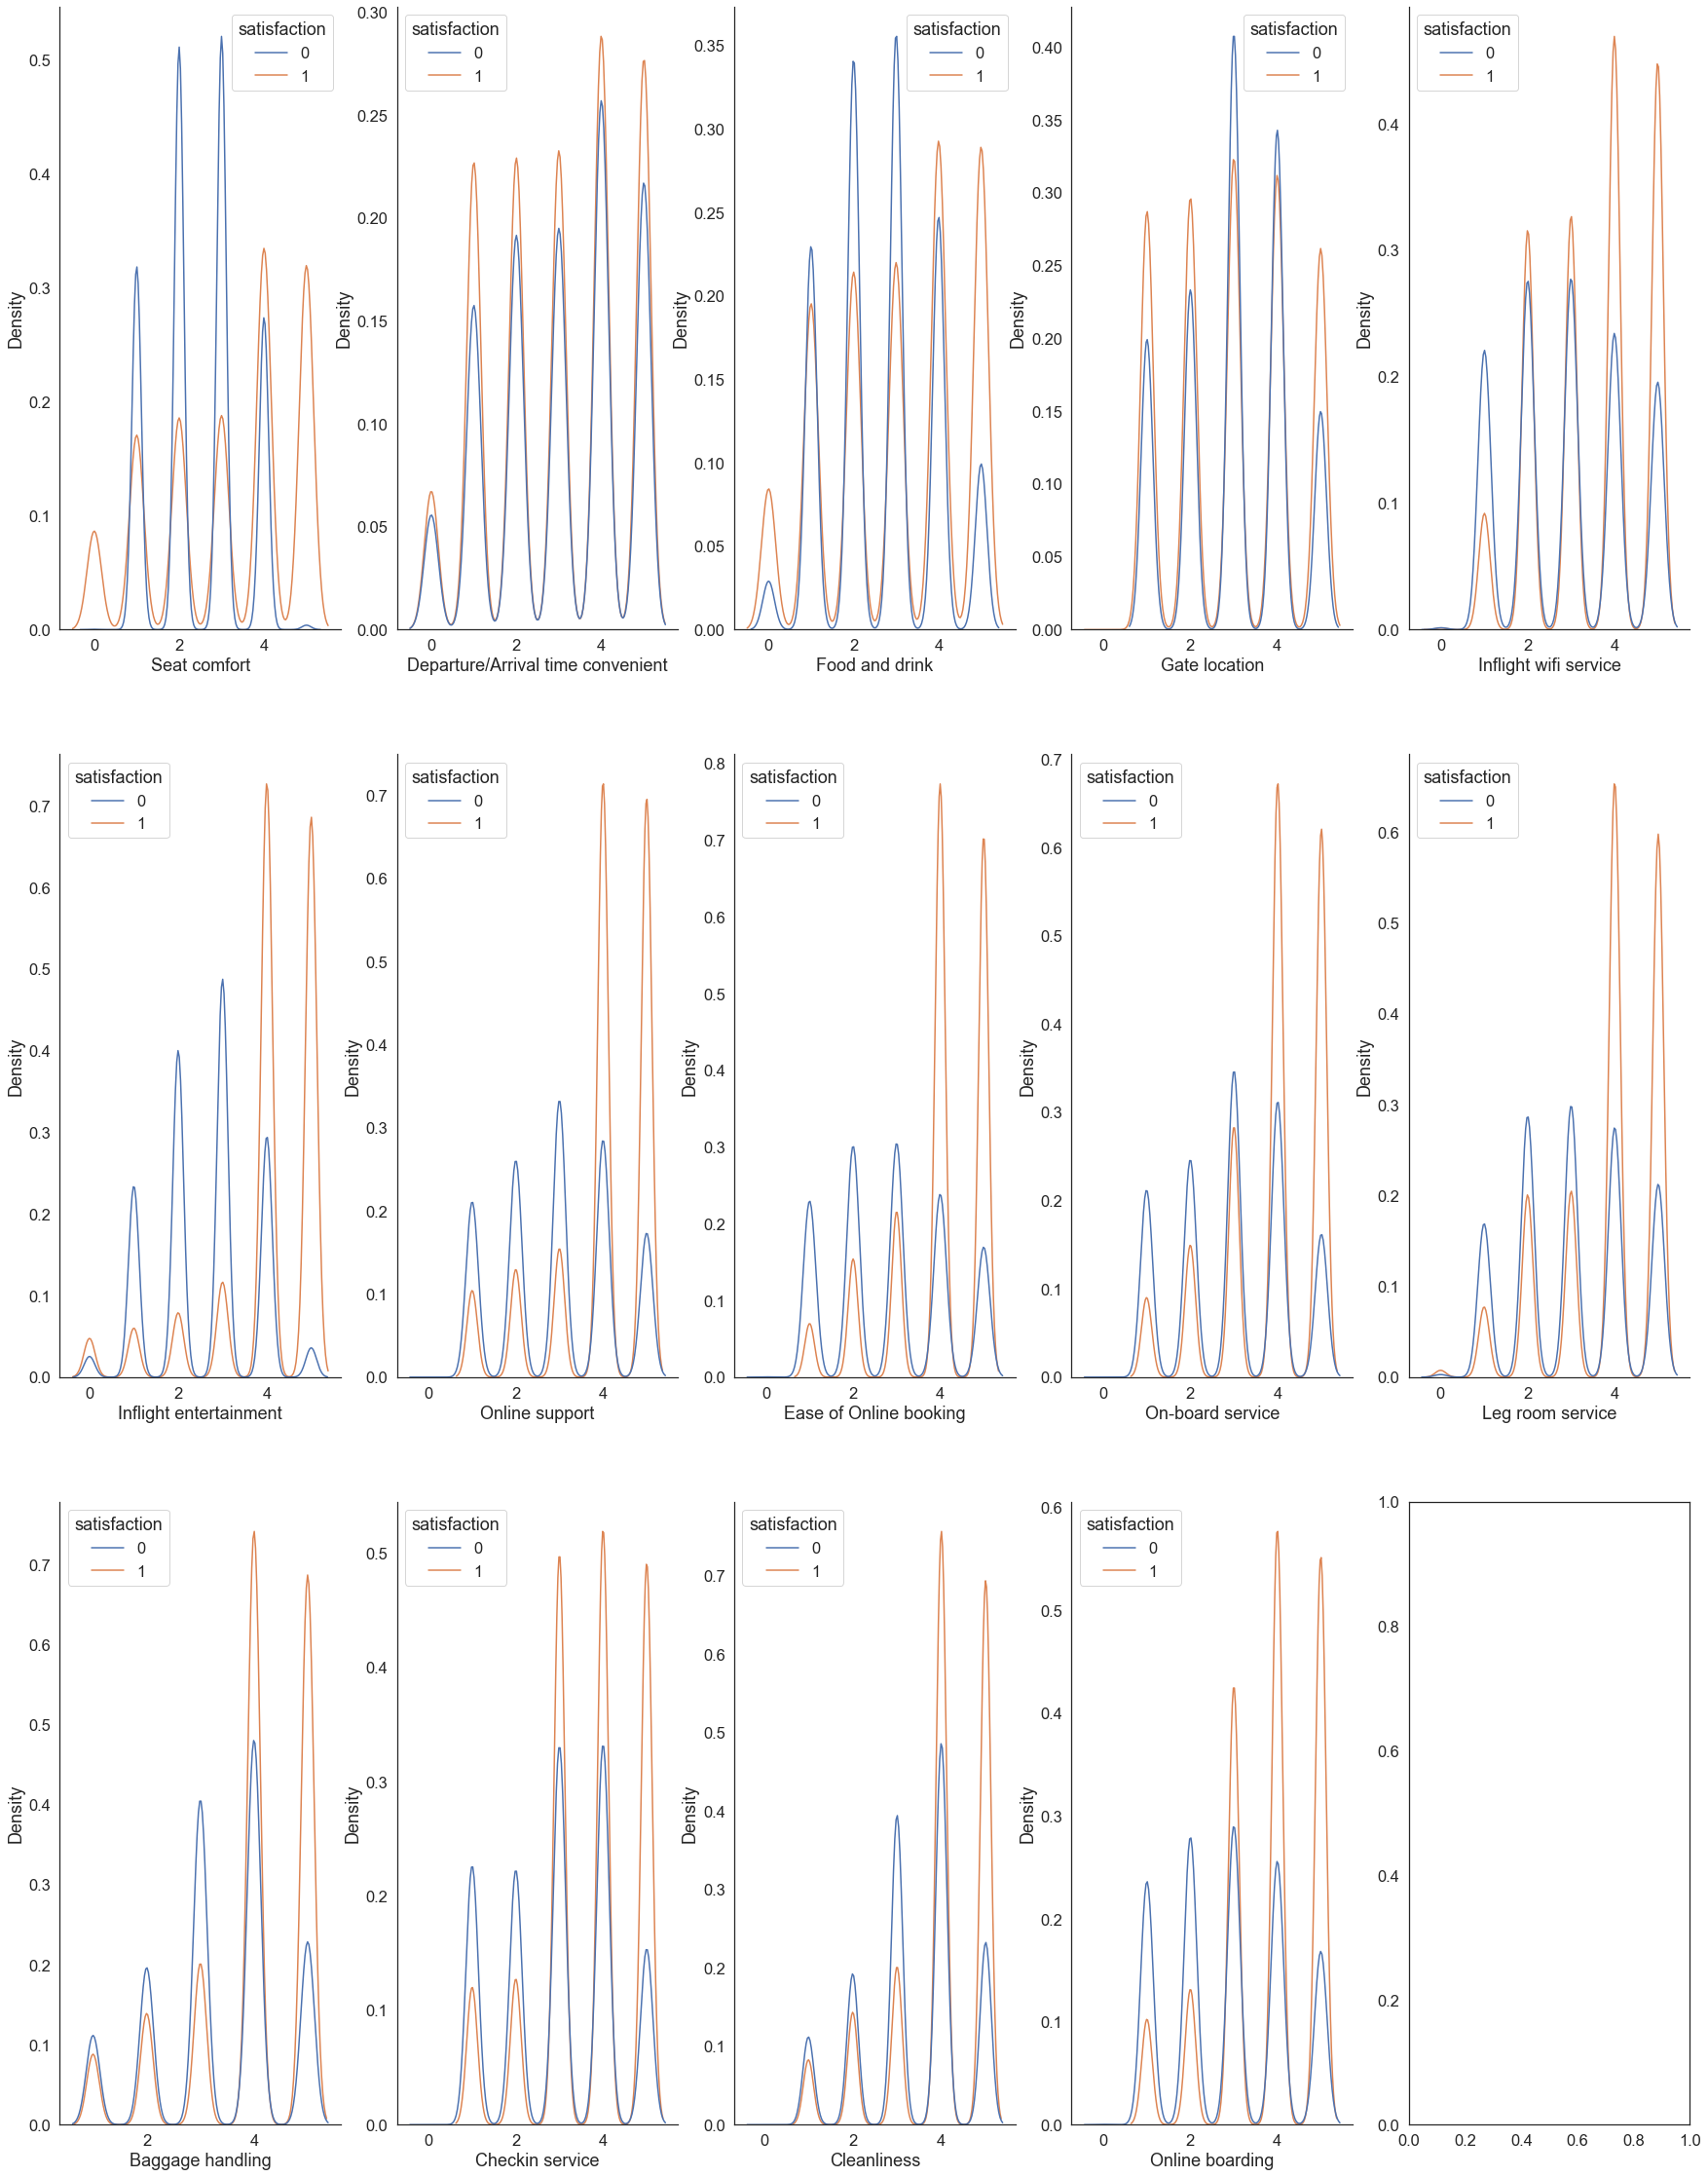

In [32]:
sns.set(style='white',font_scale=1.5)
fig = plt.figure(figsize=[30,40])
for i in range(15):
    fig.add_subplot(3, 5, i+1)
    sns.kdeplot(data=df_drop,x=df_drop.columns[i+1],hue='satisfaction')
    if i == 15:
        plt.xlim([-50,300])
    sns.despine()
    

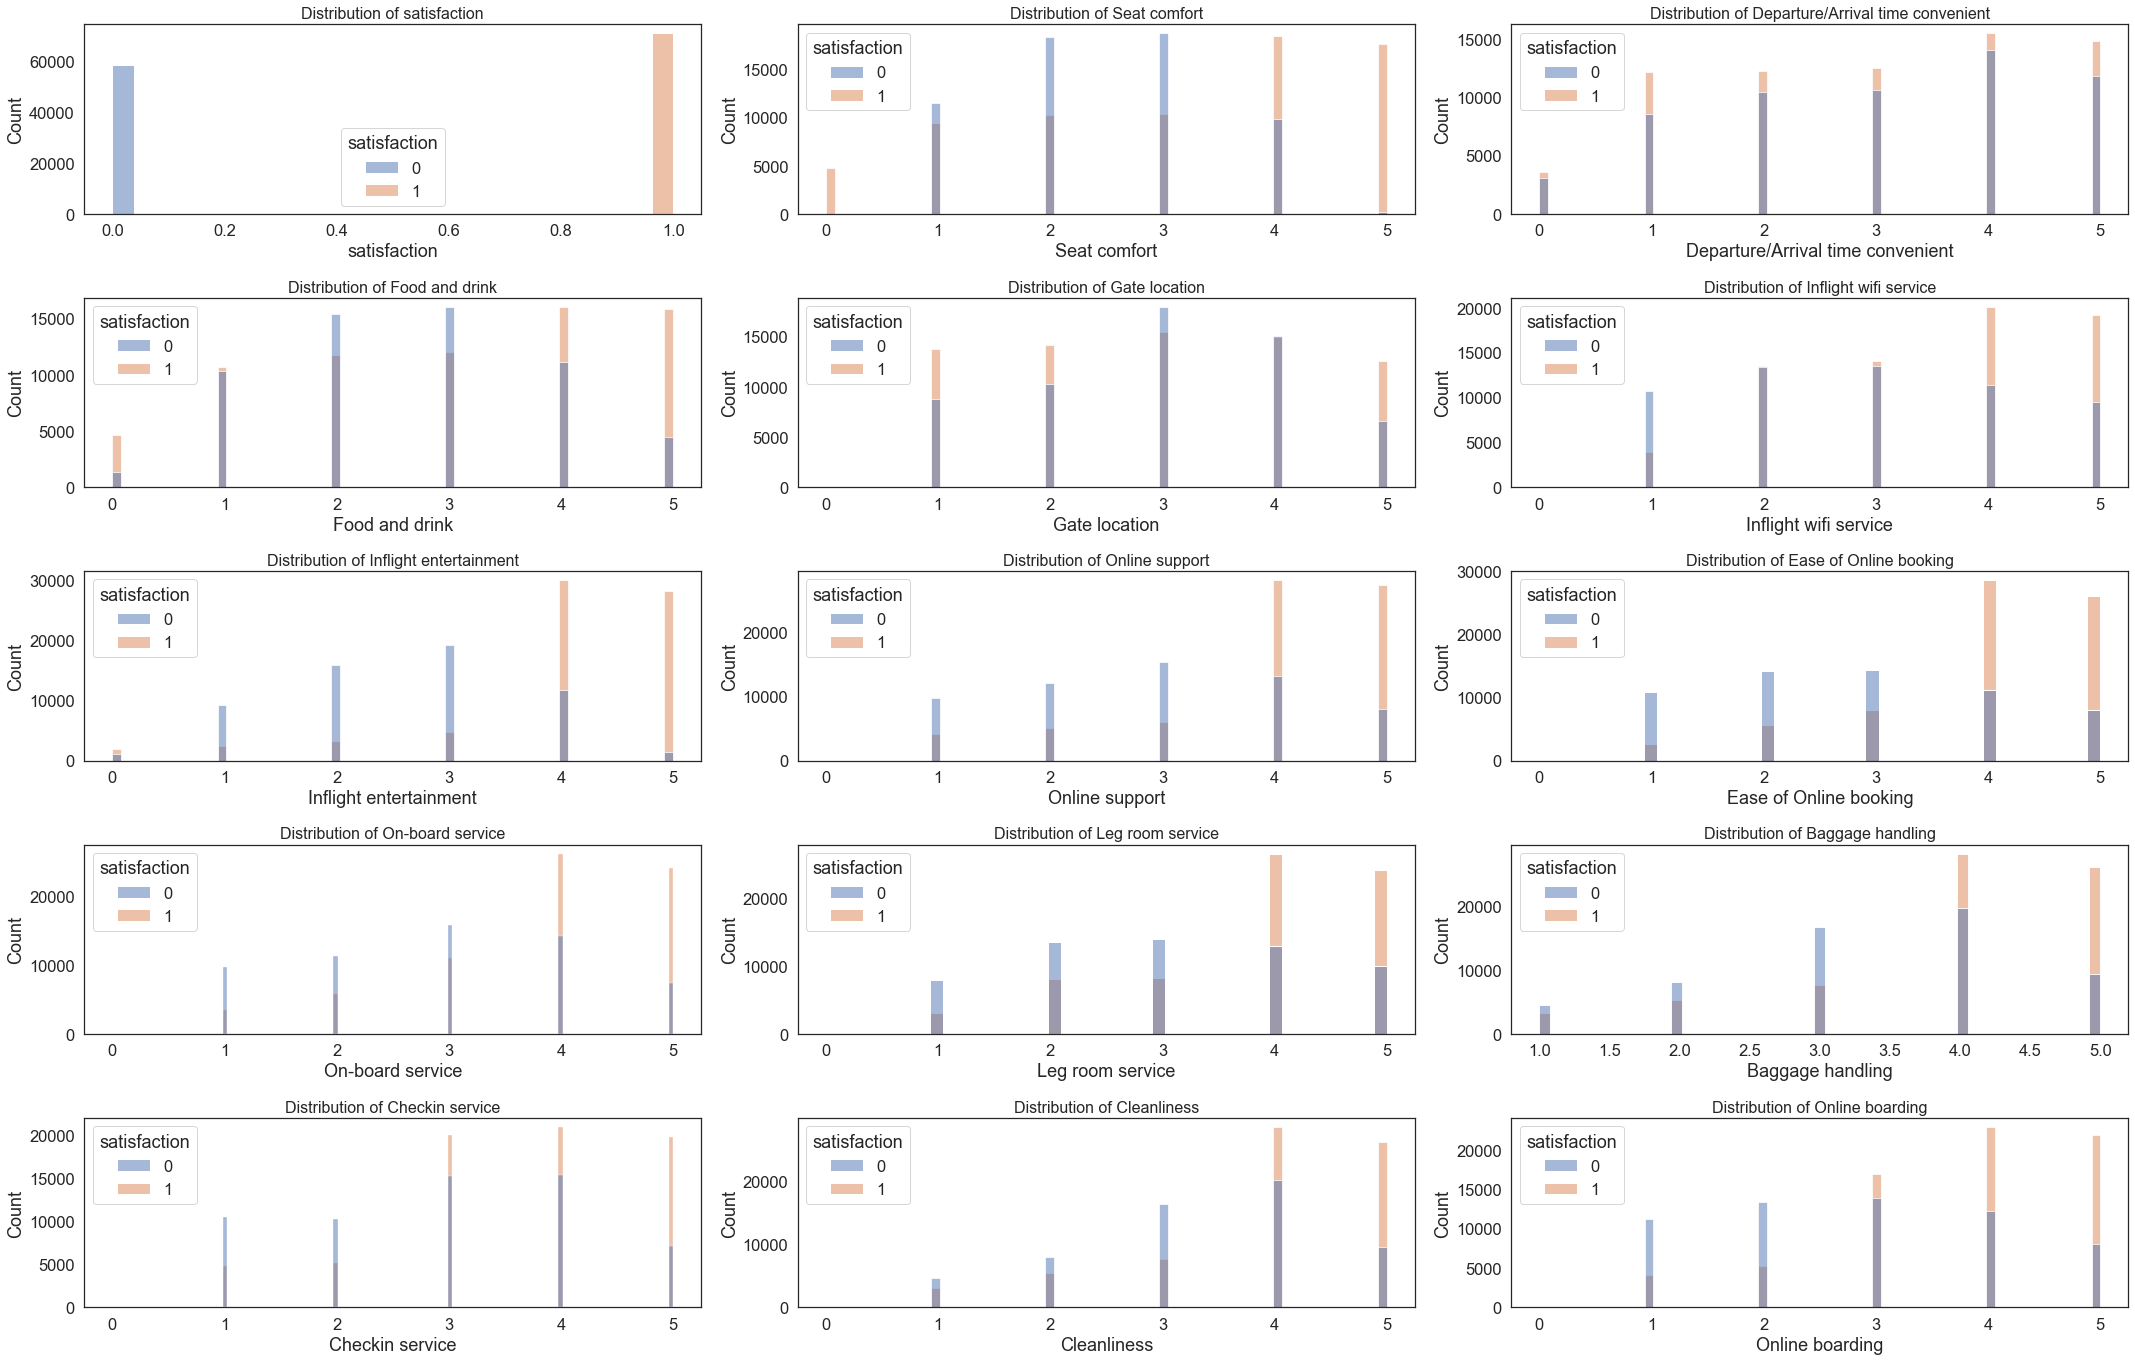

In [33]:
#plot histogram for any outliners
plt.figure(figsize = (30,30))
# Plotting histogram of each individual columns to check for outliers
num = 1
for cols in df_drop:
    plt.subplot(8,3,num)
    sns.histplot(data=df_drop, x=cols, hue= 'satisfaction')
    plt.title(f'Distribution of {cols}', size = 16)
    num +=1
plt.tight_layout();

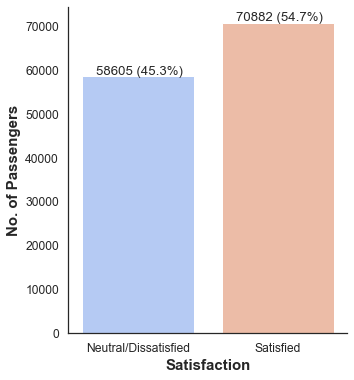

In [34]:
sns.set(style='white',font_scale=1.1)
fig = plt.figure(figsize=[5,6])
ax = sns.countplot(data=df_drop,x='satisfaction',palette='coolwarm')
ax.set_xticklabels(['Neutral/Dissatisfied','Satisfied'])
for p in ax.patches:
        ax.annotate(str(p.get_height())+' ('+str((p.get_height()/len(df)*100).round(1))+'%)', (p.get_x()+0.1, p.get_height()+400))
plt.xlabel('Satisfaction',weight='bold',fontsize='15')   
plt.ylabel('No. of Passengers',weight='bold',fontsize='15')   
sns.despine() #removes the spines from the right and upper portion of the plot by default
plt.savefig('targetplot1.png',transparent=True, bbox_inches='tight')

<AxesSubplot:>

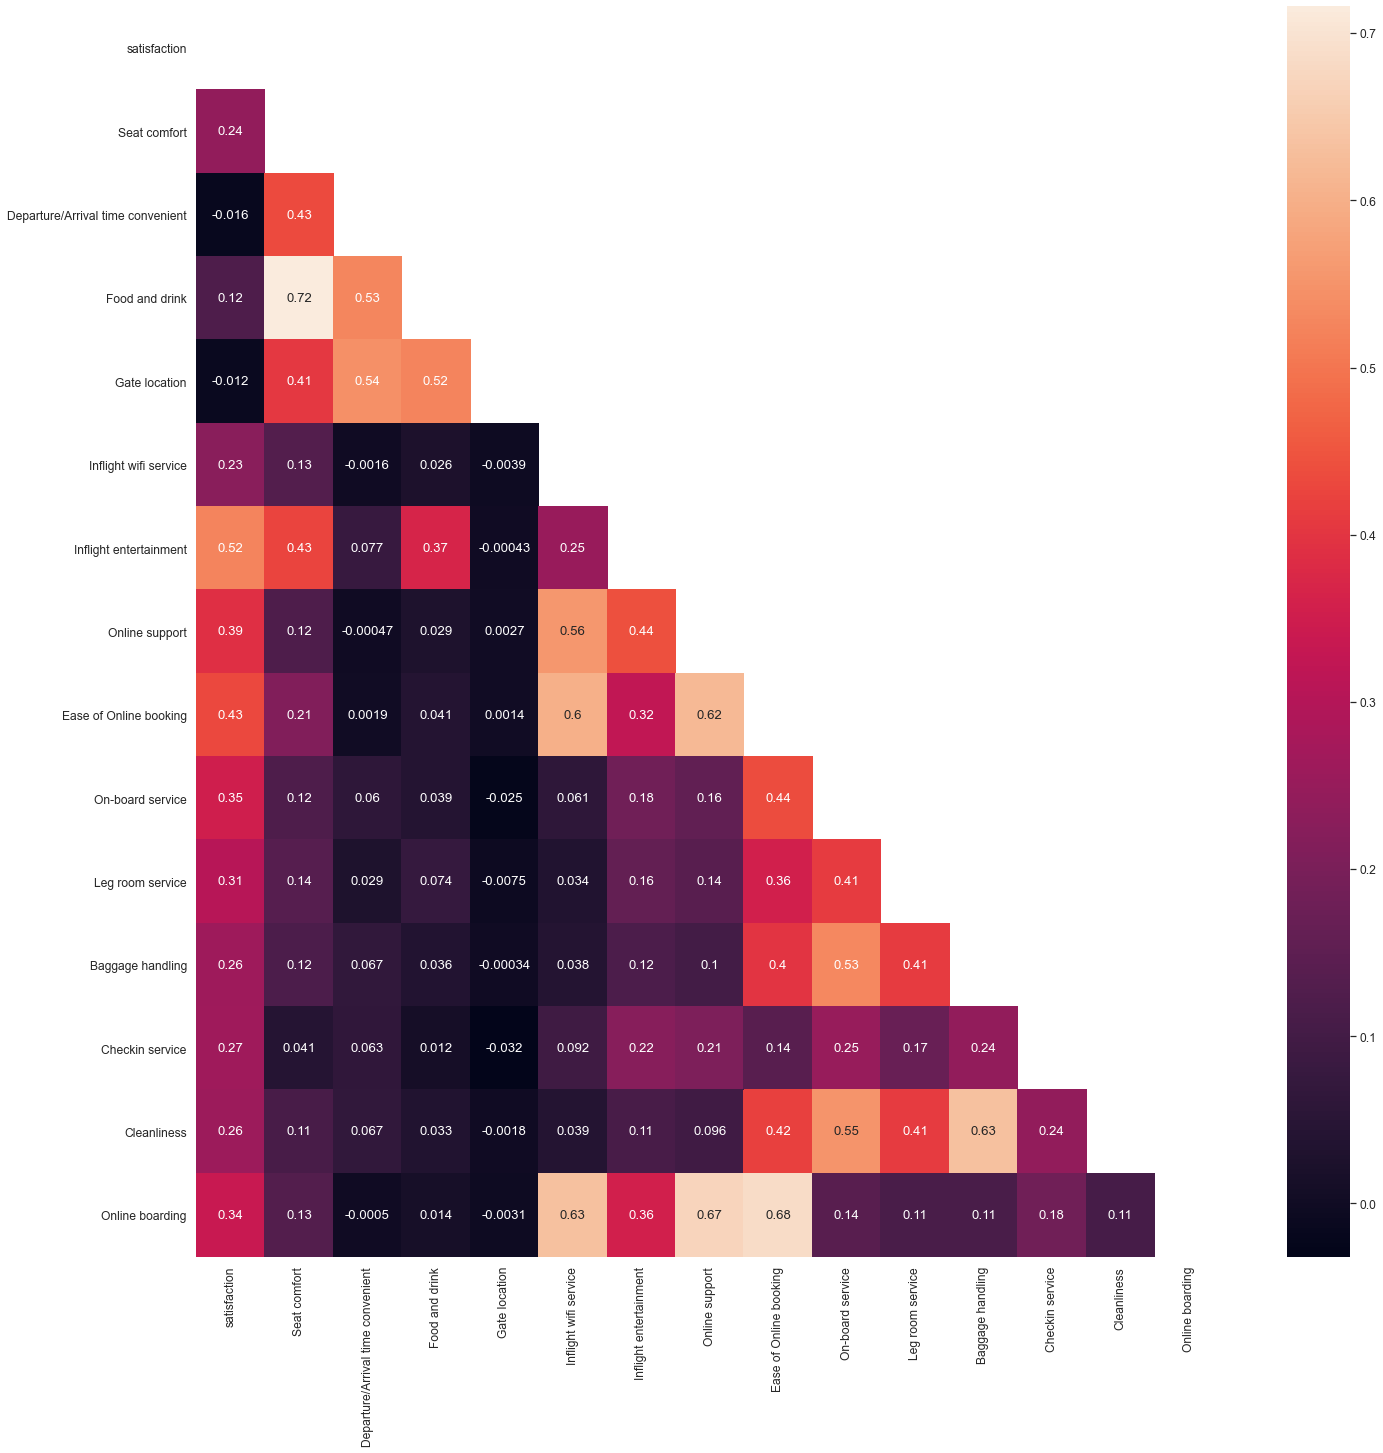

In [35]:
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(df_drop.corr())

plt.figure(figsize =(23,23))
sns.heatmap(df_drop.corr(), annot=True, mask=matrix)

In [36]:
#correlation
df_drop.corr()["satisfaction"].sort_values(ascending=False)

satisfaction                         1.000000
Inflight entertainment               0.523364
Ease of Online booking               0.432017
Online support                       0.389890
On-board service                     0.352283
Online boarding                      0.338118
Leg room service                     0.305115
Checkin service                      0.266089
Baggage handling                     0.260398
Cleanliness                          0.259504
Seat comfort                         0.242371
Inflight wifi service                0.227010
Food and drink                       0.120568
Gate location                       -0.012272
Departure/Arrival time convenient   -0.015624
Name: satisfaction, dtype: float64

#### Evaluate Different Types of ML Model

In [37]:
#define X, Y and split data set
target_col = "satisfaction"
X = df_drop[[col for col in df_drop.columns if col != target_col]]
y = df_drop[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [38]:
#print the test and train size
print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (103589, 14)
Test size: (25898, 14)


In [39]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

#StandardScaler to the training set to prevent the distribution of the test set leaking into the model. 
#If you fit the scaler on the full dataset before splitting, 
#the test set information is used to transform the training set and use it to train the model.

In [40]:
#Creating a function that creates a dataframe for 
#testing model performance
def model_p (model,X_train,X_test,y_train,y_test,pred,model_name):
  #Takes the data, returns a dataframe that calculates the performance of the model"""
  cv_results=cross_val_score(model,X_train,y_train,cv=5)
  
  perf_df=pd.DataFrame({"Mean_CV":np.mean(cv_results),"Std_CV":np.std(cv_results),'Train_Score':model.score(X_train,y_train),"Test_Score":model.score(X_test,y_test),"Precision_Score":precision_score(y_test,pred),"Recall_Score":recall_score(y_test,pred),"F1_Score":f1_score(y_test,pred)},index=[model_name])
  
  return perf_df

In [41]:
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
svc_model = LinearSVC()
nb = GaussianNB()

In [42]:
nb.fit(X_train,y_train)
pred_nb = nb.predict(X_test)
perf_nb=model_p(nb,X_train,X_test,y_train,y_test,pred_nb,"Gaussian NB")
perf_nb

Mean_CV    Std_CV  Train_Score  Test_Score  Precision_Score  \
Gaussian NB  0.790026  0.003282     0.790123    0.788555         0.793249   

             Recall_Score  F1_Score  
Gaussian NB      0.826383  0.809477

In [43]:
parameters={"C":[0.01,0.1,1,10]}
searcher=GridSearchCV(svc_model,parameters,cv=5,n_jobs=-1).fit(X_train,y_train)
best_model_svc=searcher.best_estimator_
pred_svc = best_model_svc.predict(X_test)
print("Best Parameters:",searcher.best_params_)
perf_svc=model_p(best_model_svc,X_train,X_test,y_train,y_test,pred_svc,"Linear SVC")
perf_svc

Best Parameters: {'C': 0.1}


Mean_CV    Std_CV  Train_Score  Test_Score  Precision_Score  \
Linear SVC  0.806707  0.002863     0.806736    0.805468         0.813789   

            Recall_Score  F1_Score  
Linear SVC      0.832635  0.823104

In [44]:
params={"C":[0.001,0.01,0.1,1,10],"penalty":["l1","l2"]}
searcher=GridSearchCV(logreg,params,cv=5,n_jobs=-1).fit(X_train,y_train)
best_model_log=searcher.best_estimator_
pred_log = best_model_log.predict(X_test)
print("Best Parameters:",searcher.best_params_)
y_pred_log_proba=best_model_log.predict_proba(X_test)[:,1]
print("ROC AUC Score:",roc_auc_score(y_test,y_pred_log_proba))
perf_log= model_p(best_model_log,X_train,X_test,y_train,y_test,pred_log,"Logistic Regression")
perf_log

/Users/hweeli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.80449661        nan 0.80623425        nan 0.80641767
        nan 0.80647559        nan 0.80645628]
  warnings.warn(


Best Parameters: {'C': 1, 'penalty': 'l2'}
ROC AUC Score: 0.8804267442332907


Mean_CV    Std_CV  Train_Score  Test_Score  \
Logistic Regression  0.806476  0.002761     0.806524    0.805429   

                     Precision_Score  Recall_Score  F1_Score  
Logistic Regression         0.814431      0.831498  0.822876

In [45]:
knn=KNeighborsClassifier()
params={"n_neighbors":np.arange(3,10,2)}
searcher=GridSearchCV(knn,params,cv=5,n_jobs=-1).fit(X_train,y_train)
best_model_knn=searcher.best_estimator_
pred_knn = best_model_knn.predict(X_test)
print("Best Parameters:",searcher.best_params_)
perf_knn=model_p(best_model_knn,X_train,X_test,y_train,y_test,pred_knn,"KNN")
perf_knn

Best Parameters: {'n_neighbors': 5}


Mean_CV    Std_CV  Train_Score  Test_Score  Precision_Score  \
KNN  0.912549  0.001949     0.942137    0.913545         0.931351   

     Recall_Score  F1_Score  
KNN      0.907864  0.919458

In [46]:
dt=DecisionTreeClassifier(random_state=42)
parameters={"max_depth":[*range(3,10,2),None],"max_features":[*range(3,10,2),None],"min_samples_leaf":list(range(1,10,2)),"criterion":["gini","entropy"]}
searcher=GridSearchCV(dt,parameters,cv=5,n_jobs=-1).fit(X_train,y_train)
best_model_dt=searcher.best_estimator_
pred_dt = best_model_dt.predict(X_test)
print("Best Parameters:",searcher.best_params_)
perf_dt=model_p(best_model_dt,X_train,X_test,y_train,y_test,pred_dt,"Decision Tree")
perf_dt

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 9, 'min_samples_leaf': 1}


Mean_CV    Std_CV  Train_Score  Test_Score  Precision_Score  \
Decision Tree  0.930031  0.001369     0.995347     0.93235         0.934499   

               Recall_Score  F1_Score  
Decision Tree      0.941536  0.938004

In [47]:
rf=RandomForestClassifier(random_state=42,n_estimators=300).fit(X_train,y_train)
pred_rf=rf.predict(X_test)
perf_rf=model_p(rf,X_train,X_test,y_train,y_test,pred_rf,"Random Forest")
perf_rf

Mean_CV    Std_CV  Train_Score  Test_Score  Precision_Score  \
Random Forest  0.94595  0.000983     0.995347    0.946984         0.955471   

               Recall_Score  F1_Score  
Random Forest       0.94658  0.951005

In [48]:
pd.concat([perf_nb, perf_svc, perf_log, perf_knn, perf_dt, perf_rf])

Mean_CV    Std_CV  Train_Score  Test_Score  \
Gaussian NB          0.790026  0.003282     0.790123    0.788555   
Linear SVC           0.806707  0.002863     0.806736    0.805468   
Logistic Regression  0.806476  0.002761     0.806524    0.805429   
KNN                  0.912549  0.001949     0.942137    0.913545   
Decision Tree        0.930031  0.001369     0.995347    0.932350   
Random Forest        0.945950  0.000983     0.995347    0.946984   

                     Precision_Score  Recall_Score  F1_Score  
Gaussian NB                 0.793249      0.826383  0.809477  
Linear SVC                  0.813789      0.832635  0.823104  
Logistic Regression         0.814431      0.831498  0.822876  
KNN                         0.931351      0.907864  0.919458  
Decision Tree               0.934499      0.941536  0.938004  
Random Forest               0.955471      0.946580  0.951005

In [49]:
model_df = pd.concat([perf_nb, perf_svc, perf_log, perf_knn, perf_dt, perf_rf])

In [50]:
model_df.head()

Mean_CV    Std_CV  Train_Score  Test_Score  \
Gaussian NB          0.790026  0.003282     0.790123    0.788555   
Linear SVC           0.806707  0.002863     0.806736    0.805468   
Logistic Regression  0.806476  0.002761     0.806524    0.805429   
KNN                  0.912549  0.001949     0.942137    0.913545   
Decision Tree        0.930031  0.001369     0.995347    0.932350   

                     Precision_Score  Recall_Score  F1_Score  
Gaussian NB                 0.793249      0.826383  0.809477  
Linear SVC                  0.813789      0.832635  0.823104  
Logistic Regression         0.814431      0.831498  0.822876  
KNN                         0.931351      0.907864  0.919458  
Decision Tree               0.934499      0.941536  0.938004

In [51]:
model_df.columns

Index(['Mean_CV', 'Std_CV', 'Train_Score', 'Test_Score', 'Precision_Score',
       'Recall_Score', 'F1_Score'],
      dtype='object')

In [52]:
df1 = model_df.rename_axis('Model').reset_index()

In [53]:
df1.iloc[:,0]

0            Gaussian NB
1             Linear SVC
2    Logistic Regression
3                    KNN
4          Decision Tree
5          Random Forest
Name: Model, dtype: object

In [54]:
df1

Model   Mean_CV    Std_CV  Train_Score  Test_Score  \
0          Gaussian NB  0.790026  0.003282     0.790123    0.788555   
1           Linear SVC  0.806707  0.002863     0.806736    0.805468   
2  Logistic Regression  0.806476  0.002761     0.806524    0.805429   
3                  KNN  0.912549  0.001949     0.942137    0.913545   
4        Decision Tree  0.930031  0.001369     0.995347    0.932350   
5        Random Forest  0.945950  0.000983     0.995347    0.946984   

   Precision_Score  Recall_Score  F1_Score  
0         0.793249      0.826383  0.809477  
1         0.813789      0.832635  0.823104  
2         0.814431      0.831498  0.822876  
3         0.931351      0.907864  0.919458  
4         0.934499      0.941536  0.938004  
5         0.955471      0.946580  0.951005

<AxesSubplot:>

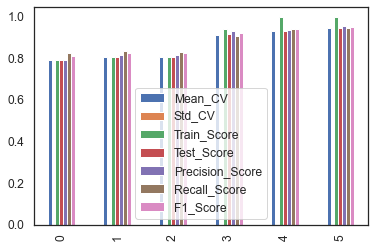

In [55]:
df1.plot(kind='bar')

In [56]:
df1.columns

Index(['Model', 'Mean_CV', 'Std_CV', 'Train_Score', 'Test_Score',
       'Precision_Score', 'Recall_Score', 'F1_Score'],
      dtype='object')

#### Random Forest Model

##### highest accuracy compared to other models

In [57]:
perf_rf

Mean_CV    Std_CV  Train_Score  Test_Score  Precision_Score  \
Random Forest  0.94595  0.000983     0.995347    0.946984         0.955471   

               Recall_Score  F1_Score  
Random Forest       0.94658  0.951005

In [58]:
#define X, Y and split data set
target_col = "satisfaction"
X = df_drop[[col for col in df_drop.columns if col != target_col]]
y = df_drop[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [59]:
#scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [60]:
model=RandomForestClassifier()

In [61]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [62]:
params = {
    #"n_estimators": range(2,300),
    "criterion": ["gini", "entropy"],
    "class_weight":["None","balanced"]
}

In [63]:
gs = GridSearchCV(estimator= model, param_grid = params) 
#grid search to get the best parameters
gs.fit(X, y) #original dataset

/Users/hweeli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hweeli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hweeli/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 331, in fit
    y, expanded_class_weight = self._validate_y_class_weight(y)
  File "/Users/hweeli/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 582, in _validate_y_class_weight
    raise ValueError('Valid presets for class_weight include '
ValueError: Valid presets for class_weight include "balanced" and "balanced_subsample".Given "None".

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/hwee

/Users/hweeli/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.86631829 0.86585491]
  warnings.warn(


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['None', 'balanced'],
                         'criterion': ['gini', 'entropy']})

In [64]:
gs.best_params_

{'class_weight': 'balanced', 'criterion': 'gini'}

In [65]:
gs.best_estimator_.feature_importances_

array([0.14933399, 0.04151681, 0.04949888, 0.03806376, 0.03147408,
       0.25689732, 0.07107593, 0.09233444, 0.05609794, 0.06217434,
       0.03631311, 0.03943407, 0.0356018 , 0.04018353])

In [66]:
best_model = gs.best_estimator_

In [67]:
best_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [68]:
best_model.score(X_train, y_train) #score with best model 

0.9953373427680545

In [69]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [70]:
model.score(X_train, y_train) #score with default model

0.9953469963026962

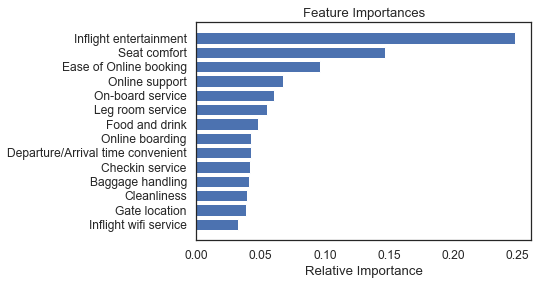

In [71]:
features = X.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.savefig('targetplot4.png',transparent=True, bbox_inches='tight')

In [72]:
y_pred = model.predict(X_test) #predict the test set
print("Random Forest score: {:.4f}".format(model.score(X_train,y_train)))

Random Forest score: 0.9953


In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     11821
           1       0.96      0.95      0.95     14077

    accuracy                           0.95     25898
   macro avg       0.95      0.95      0.95     25898
weighted avg       0.95      0.95      0.95     25898



In [74]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9480654876824465


In [75]:
print("Precision:", precision_score(y_test, y_pred))

Precision: 0.9564095210782908


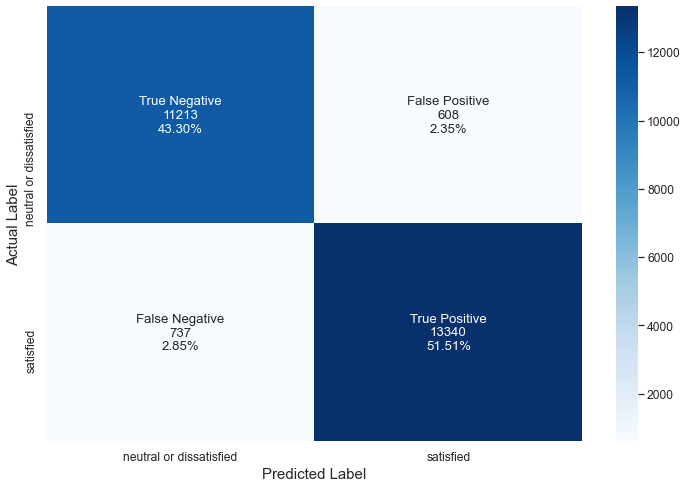

In [76]:
plt.figure(figsize=(12, 8))
cf_matrix=confusion_matrix(y_test,y_pred)
group_names = ["True Negative","False Positive","False Negative","True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax=sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues',xticklabels=["neutral or dissatisfied","satisfied"], yticklabels=["neutral or dissatisfied","satisfied"])
ax.set_xlabel('Predicted Label',fontsize = 15)
ax.set_ylabel('Actual Label',fontsize = 15)

plt.savefig('confusionmatrix.png',transparent=True, bbox_inches='tight')

In [77]:
X_train

array([[ 0.832696  ,  0.6631995 ,  0.79482617, ..., -1.85727494,
         0.25590362,  1.26904953],
       [-0.60412557, -0.6471848 ,  0.10178603, ...,  0.52181766,
         1.12575758,  1.26904953],
       [-1.32253635, -1.30237695, -1.28429426, ..., -1.85727494,
        -0.61395035,  0.49833755],
       ...,
       [-2.04094714, -0.6471848 , -1.9773344 , ..., -1.85727494,
         0.25590362, -1.81379838],
       [ 0.832696  ,  1.31839165,  1.48786631, ..., -1.06424407,
         0.25590362, -1.81379838],
       [ 0.11428522,  0.00800735,  0.10178603, ..., -0.2712132 ,
         1.12575758,  1.26904953]])

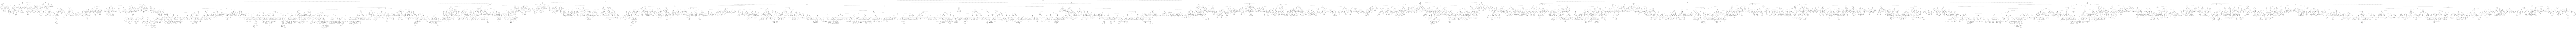

In [78]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
from sklearn.tree import export_graphviz
from IPython import display
from sklearn.ensemble import RandomForestRegressor

# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz

# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = X.columns, rounded = True, precision = 1)
# Use dot file to create a graph
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
# Write graph to a png file
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

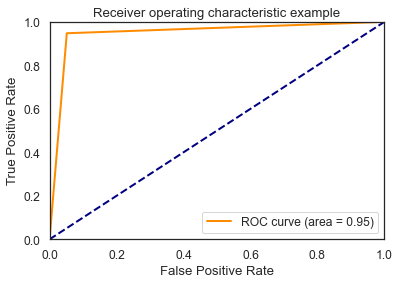

In [79]:
#ROC curve
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = model.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = roc_curve(y_test, y_pred)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()